## Bottleneck

### Load MNIST data

In [1]:
import matplotlib.pyplot as plt
import numpy             as np
from tensorflow.keras.datasets import mnist

(kxl,cl), (kxt,ct) = mnist.load_data()

xl = kxl.reshape(len(kxl),-1)/255
xt = kxt.reshape(len(kxt),-1)/255
print(xl.shape, cl.shape)
print(xt.shape, ct.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


In [4]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Softmax, Flatten
from tensorflow.keras.utils import plot_model

### 2D embedding

In [2]:
model = Sequential()
model.add(keras.Input(shape=(28*28,)))
for u in [256, 128, 64, 32, 2, 32, 64, 128, 256]:
    model.add(keras.layers.Dense(units=u, activation='relu' if u!=2 else 'sigmoid'))
model.add(keras.layers.Dense(units=28*28, activation='linear'))
model.compile(loss='mse', optimizer='adam')

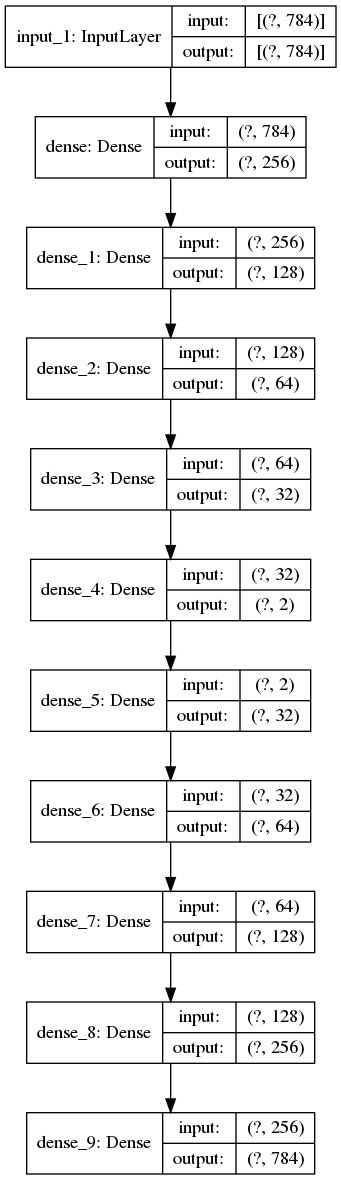

In [5]:
plot_model(model, show_shapes=True)

In [3]:
model.fit(xl, xl, epochs=100, batch_size=500, verbose=1)

Epoch 1/100
120/120 [==============================] - 1s 5ms/step - loss: 0.0696
Epoch 2/100
120/120 [==============================] - 1s 5ms/step - loss: 0.0598
Epoch 3/100
120/120 [==============================] - 1s 5ms/step - loss: 0.0544
Epoch 4/100
120/120 [==============================] - 1s 5ms/step - loss: 0.0512
Epoch 5/100
120/120 [==============================] - 1s 5ms/step - loss: 0.0479
Epoch 6/100
120/120 [==============================] - 1s 5ms/step - loss: 0.0458
Epoch 7/100
120/120 [==============================] - 1s 5ms/step - loss: 0.0444
Epoch 8/100
120/120 [==============================] - 1s 5ms/step - loss: 0.0435
Epoch 9/100
120/120 [==============================] - 1s 5ms/step - loss: 0.0430
Epoch 10/100
120/120 [==============================] - 1s 5ms/step - loss: 0.0424
Epoch 11/100
120/120 [==============================] - 1s 5ms/step - loss: 0.0418
Epoch 12/100
120/120 [==============================] - 1s 6ms/step - loss: 0.0414
Epoch 13/100


120/120 [==============================] - 1s 5ms/step - loss: 0.0349
Epoch 100/100
120/120 [==============================] - 1s 5ms/step - loss: 0.0350


In [6]:
pred = model.predict(xl)

In [7]:
def shdig(v):
    x = np.reshape(v,[28,28])
    plt.imshow(1-x, 'gray', vmin=0, vmax=1, interpolation="nearest");

def compare(k):
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1); shdig(xl[k])
    plt.subplot(1,2,2); shdig(pred[k])

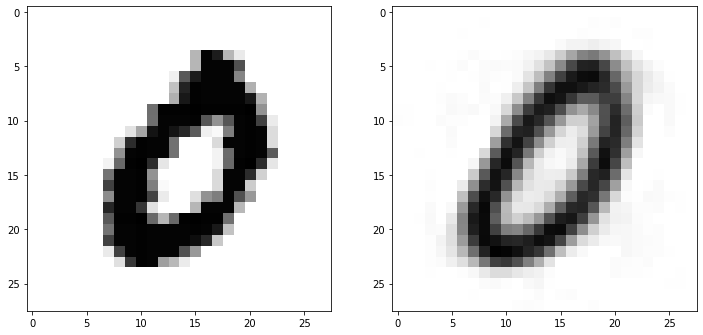

In [8]:
compare(37)

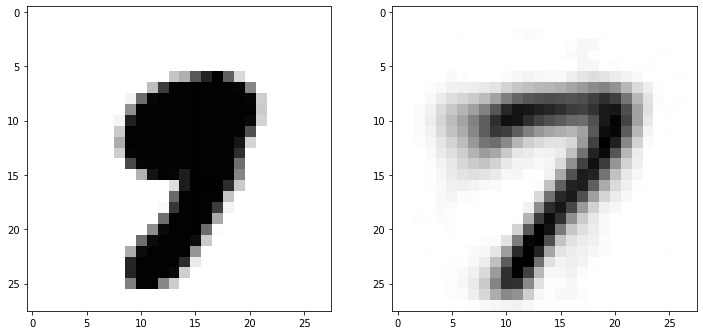

In [9]:
compare(10235)

In [10]:
encoder = keras.Sequential()
encoder.add(keras.Input(shape=(28*28,)))
for x in model.layers[:5]:
    encoder.add(x)
    
decoder = keras.Sequential()
decoder.add(keras.Input(shape=(2,)))
for x in model.layers[5:]:
    decoder.add(x)

In [12]:
xy = encoder.predict(xl)

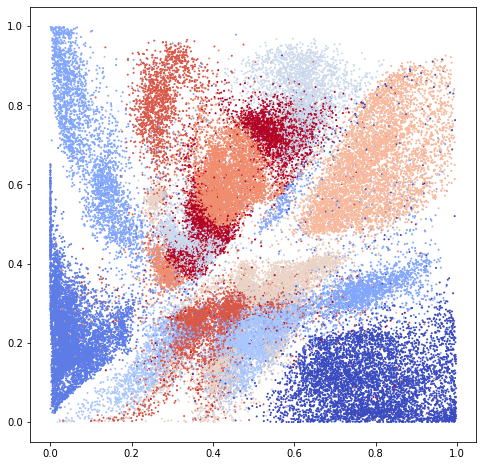

In [13]:
plt.figure(figsize=(8,8))
plt.scatter(*xy.T,s=1,c=cl,cmap='coolwarm');

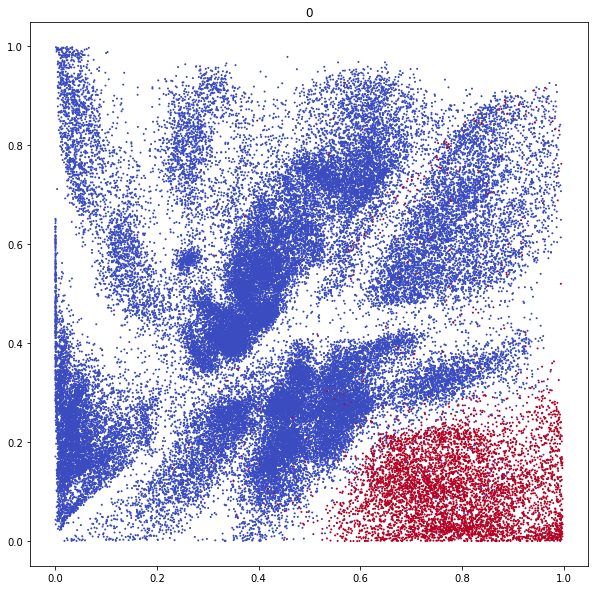

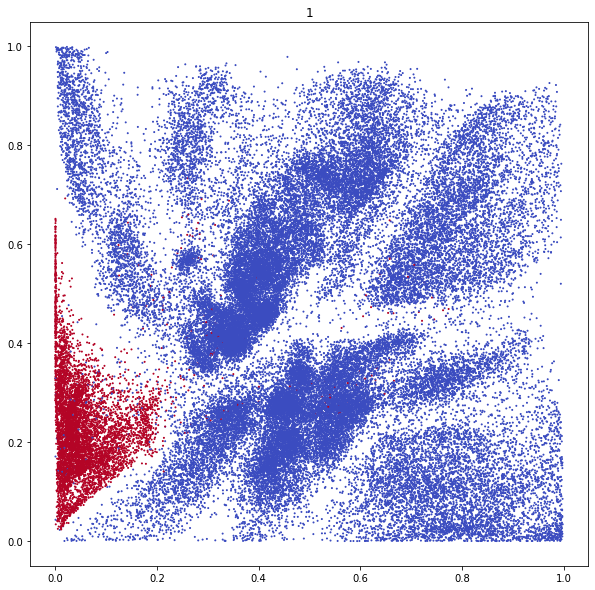

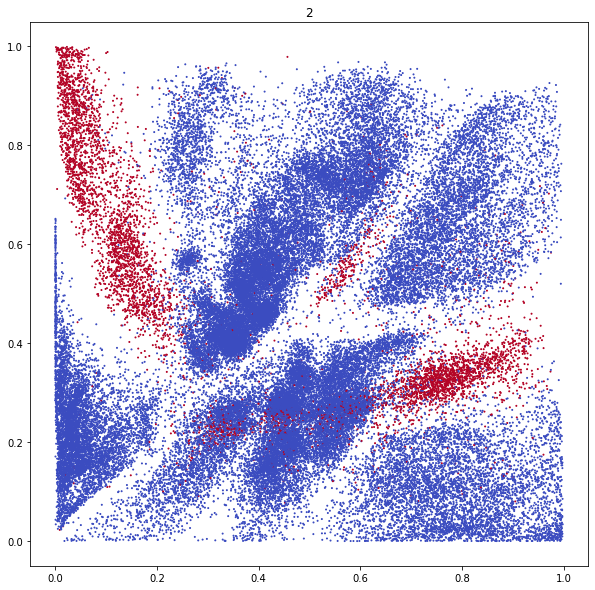

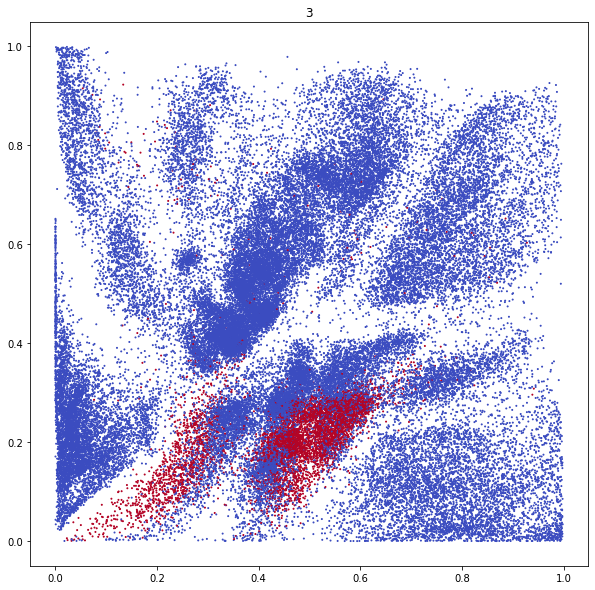

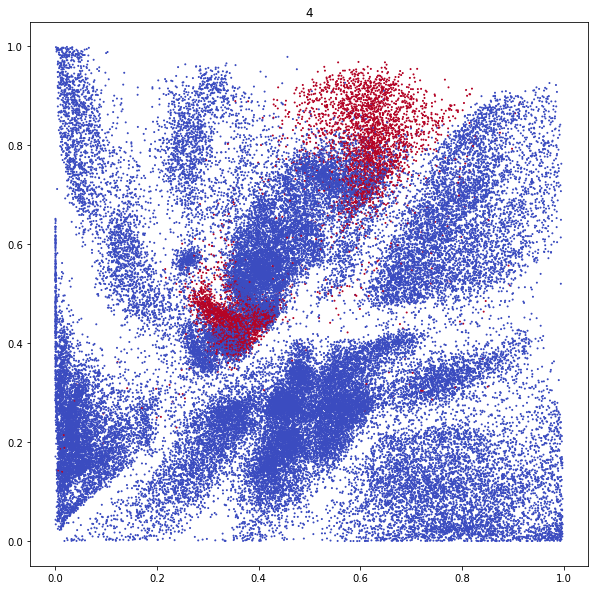

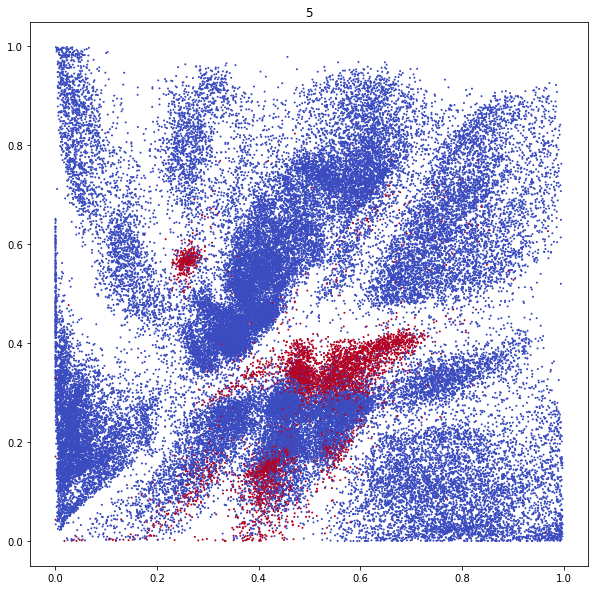

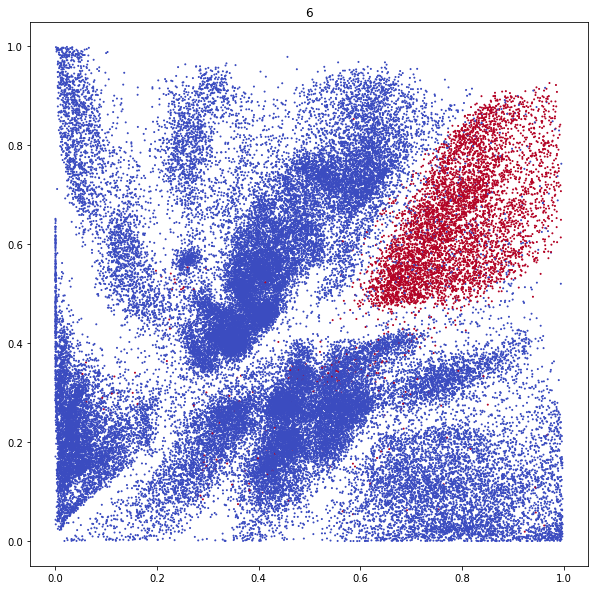

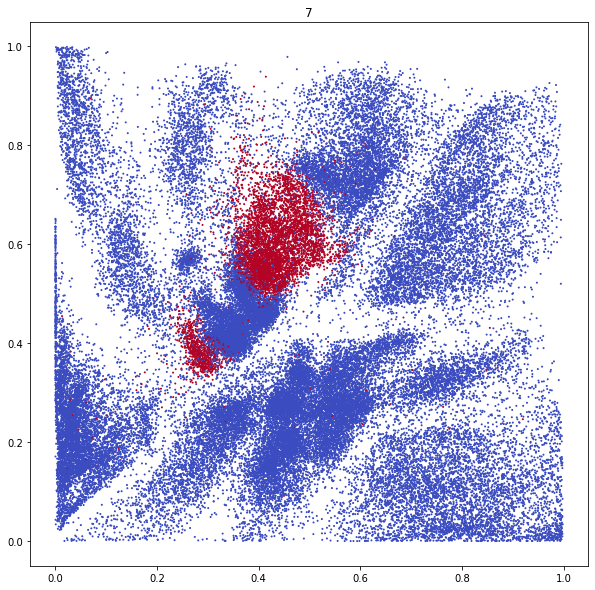

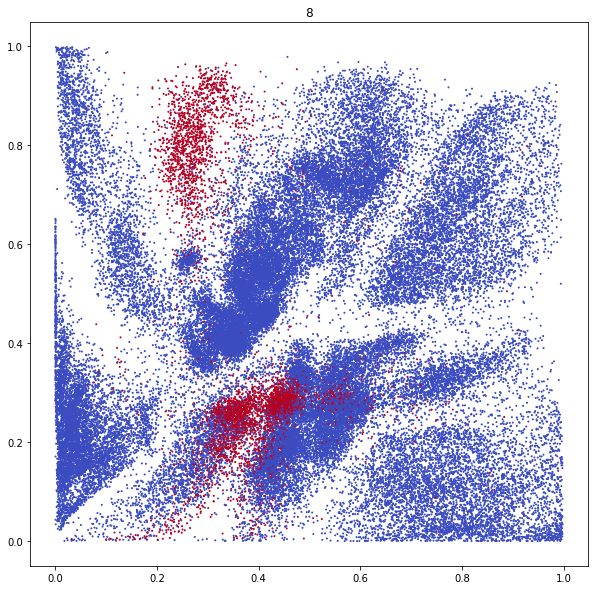

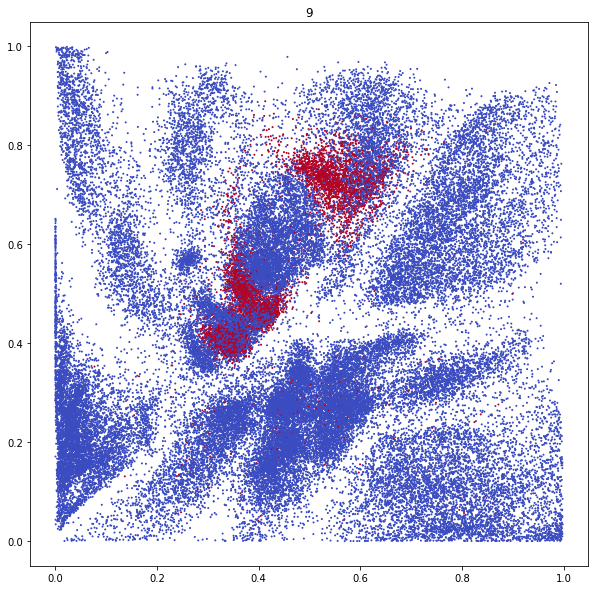

In [14]:
for d in range(10):
    plt.figure(figsize=(10,10))
    plt.scatter(*xy.T,s=1,c=cl==d,cmap='coolwarm');
    plt.title(d)
    plt.show()

### 3D embedding

In [15]:
model = Sequential()
model.add(keras.Input(shape=(28*28,)))
for u in [256, 128, 64, 32, 3, 32, 64, 128, 256]:
    model.add(keras.layers.Dense(units=u, activation='relu' if u!=3 else 'sigmoid'))
model.add(keras.layers.Dense(units=28*28, activation='linear'))
model.compile(loss='mse', optimizer='adam')

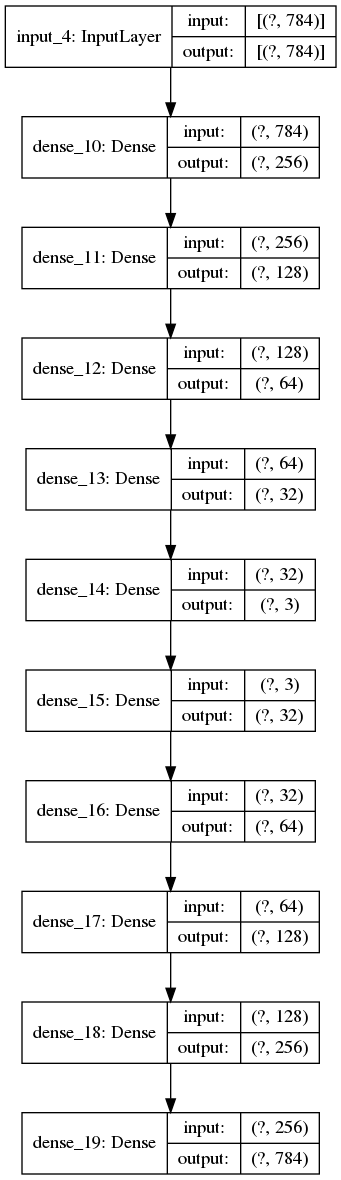

In [16]:
plot_model(model, show_shapes=True)

In [17]:
model.fit(xl, xl, epochs=100, batch_size=500, verbose=1)

Epoch 1/100
120/120 [==============================] - 1s 5ms/step - loss: 0.0682
Epoch 2/100
120/120 [==============================] - 1s 5ms/step - loss: 0.0565
Epoch 3/100
120/120 [==============================] - 1s 5ms/step - loss: 0.0489
Epoch 4/100
120/120 [==============================] - 1s 5ms/step - loss: 0.0436
Epoch 5/100
120/120 [==============================] - 1s 5ms/step - loss: 0.0409
Epoch 6/100
120/120 [==============================] - 1s 5ms/step - loss: 0.0393
Epoch 7/100
120/120 [==============================] - 1s 5ms/step - loss: 0.0381
Epoch 8/100
120/120 [==============================] - 1s 5ms/step - loss: 0.0372
Epoch 9/100
120/120 [==============================] - 1s 5ms/step - loss: 0.0366
Epoch 10/100
120/120 [==============================] - 1s 5ms/step - loss: 0.0360
Epoch 11/100
120/120 [==============================] - 1s 5ms/step - loss: 0.0356
Epoch 12/100
120/120 [==============================] - 1s 5ms/step - loss: 0.0352
Epoch 13/100


120/120 [==============================] - 1s 5ms/step - loss: 0.0292
Epoch 100/100
120/120 [==============================] - 1s 5ms/step - loss: 0.0292


In [18]:
encoder = keras.Sequential()
encoder.add(keras.Input(shape=(28*28,)))
for x in model.layers[:5]:
    encoder.add(x)
    
decoder = keras.Sequential()
decoder.add(keras.Input(shape=(3,)))
for x in model.layers[5:]:
    decoder.add(x)

xyz = encoder.predict(xl)

#encoder.save('encoder.keras')
#decoder.save('decoder.keras')

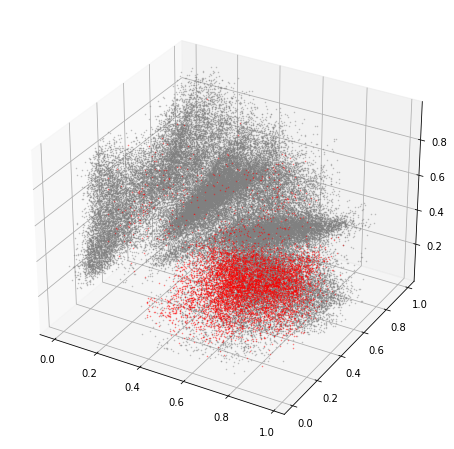

In [19]:
showclass = 3

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
ax.plot(*xyz[cl!=showclass].T,'.',markersize=1,alpha=0.5,color='gray');
ax.plot(*xyz[cl==showclass].T,'.',markersize=1,alpha=0.5,color='red');

#ax.scatter(*map.T,s=0.1,c=cl==0,cmap='coolwarm',alpha=0.5);


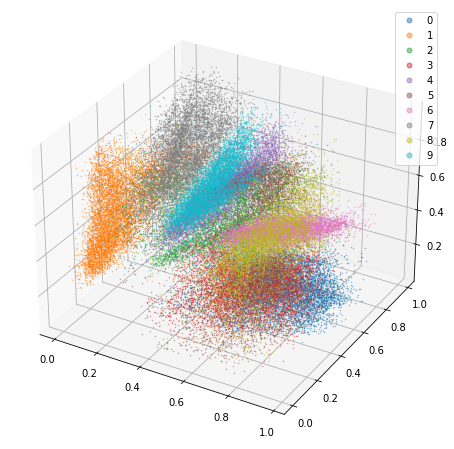

In [20]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
for c in range(10):
    ax.plot(*xyz[cl==c].T,'.',markersize=1,alpha=0.5,label=c);
plt.legend(markerscale=10);

In [21]:
%matplotlib tk

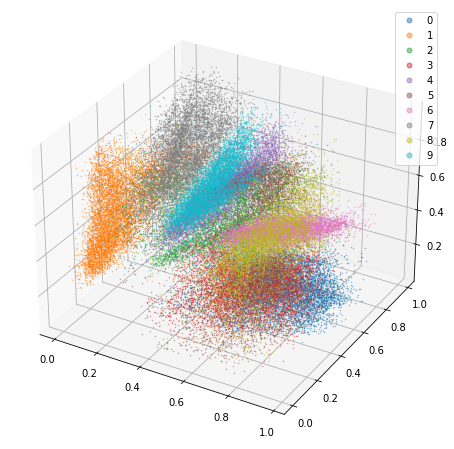

In [20]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
for c in range(10):
    ax.plot(*xyz[cl==c].T,'.',markersize=1,alpha=0.5,label=c);
plt.legend(markerscale=10);

In [55]:
%matplotlib inline

In [21]:
from ipywidgets import interactive, FloatSlider

def fun(a=0.5,b=0.5,c=0.5):
    shdig(decoder.predict([[a,b,c]]));

interactive(fun, a=(0.,1,0.01), b=(0.,1,0.01), c=(0.,1,0.01))

interactive(children=(FloatSlider(value=0.5, description='a', max=1.0, step=0.01), FloatSlider(value=0.5, desc…